In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('Train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values:")
print(missing_values)
print("\nPercentage of Missing Values:")
print(missing_percentage)

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of Missing Values:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
df.shape

(891, 12)

In [7]:
df = df.drop(columns=["Cabin"])
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print("Number of missing values after imputation:")
print(df.isnull().sum())

Number of missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-7-014883b96011>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-7-014883b96011>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [8]:
melted_df = pd.melt(df, id_vars=['PassengerId', 'Name'], value_vars=['Sex', 'Age', 'Fare'], var_name='Feature', value_name='Value')
melted_df.head()

,PassengerId,Name,Feature,Value
0,1,"Braund, Mr. Owen Harris",Sex,male
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Sex,female
2,3,"Heikkinen, Miss. Laina",Sex,female
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Sex,female
4,5,"Allen, Mr. William Henry",Sex,male


In [9]:
melted_df2 = pd.melt(df, id_vars=['PassengerId'], value_vars=['Pclass', 'Embarked', 'Survived'], var_name='Feature', value_name='Value')
melted_df2.head()

,PassengerId,Feature,Value
0,1,Pclass,3
1,2,Pclass,1
2,3,Pclass,3
3,4,Pclass,1
4,5,Pclass,3


In [10]:
melted_df3 = pd.melt(df, id_vars=['PassengerId'], value_vars=['SibSp', 'Parch'], var_name='Feature', value_name='Value')
melted_df3.head()

,PassengerId,Feature,Value
0,1,SibSp,1
1,2,SibSp,1
2,3,SibSp,0
3,4,SibSp,1
4,5,SibSp,0


In [11]:
survival_rate = df.groupby('Sex')['Survived'].mean()
print(survival_rate)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [12]:
average_fare = df.groupby('Pclass')['Fare'].mean()
print(average_fare)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [13]:
survivors_by_port = df.groupby('Embarked')['Survived'].sum()
print(survivors_by_port)

Embarked
C     93
Q     30
S    219
Name: Survived, dtype: int64


In [14]:
pivot_table = pd.pivot_table(
    df,
    values='Survived',
    index='Sex',
    columns='Pclass',
    aggfunc='mean'
)
print(pivot_table)

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


In [15]:
fare_pivot = pd.pivot_table(
    df,
    values='Fare',
    index='Sex',
    columns='Embarked',
    aggfunc='mean'
)

print(fare_pivot)

Embarked          C          Q          S
Sex                                      
female    75.169805  12.634958  39.143456
male      48.262109  13.838922  21.711996


In [16]:
passenger_count_pivot = pd.pivot_table(
    df,
    values='PassengerId',
    index='Pclass',
    columns='Survived',
    aggfunc='count'
)

print(passenger_count_pivot)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


### Overview
#### Part 1 (Data Overview)
- Size of dataset (891, 12) where rows=891 & columns=12
- Yes, there are mising values in "Age","Cabin" & "Embark" Columns:
- Percentage of Missing Values:
 - Age            19.865320
 - Cabin          77.104377
 - Embarked        0.224467



#### Part 2 (Passenger Demographics)

In [17]:
pclass_distribution = df['Pclass'].value_counts()
print(pclass_distribution)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [18]:
age_stats = df['Age'].describe()
print(age_stats)

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


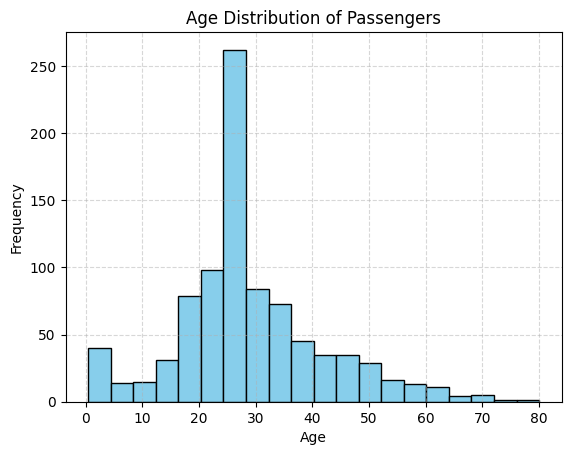

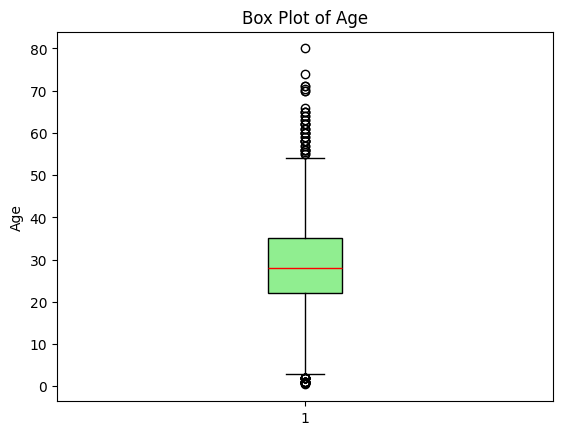

In [19]:

plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Passengers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
print('\n\n')
plt.boxplot(df['Age'], patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))
plt.ylabel('Age')
plt.title('Box Plot of Age')
plt.show()



In [20]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print("Potential Outliers:")
print(outliers)

Potential Outliers:
     PassengerId  Survived  Pclass  \
7              8         0       3   
11            12         1       1   
15            16         1       2   
16            17         0       3   
33            34         0       2   
..           ...       ...     ...   
827          828         1       2   
829          830         1       1   
831          832         1       2   
851          852         0       3   
879          880         1       1   

                                              Name     Sex    Age  SibSp  \
7                   Palsson, Master. Gosta Leonard    male   2.00      3   
11                        Bonnell, Miss. Elizabeth  female  58.00      0   
15                Hewlett, Mrs. (Mary D Kingcome)   female  55.00      0   
16                            Rice, Master. Eugene    male   2.00      4   
33                           Wheadon, Mr. Edward H    male  66.00      0   
..                                             ...     ...    ...  

#### Part # (Survival Analysis)

In [21]:
gender_distribution = df['Sex'].value_counts()
print(gender_distribution)

Sex
male      577
female    314
Name: count, dtype: int64


In [22]:
overall_survival_rate = df['Survived'].mean()
print(f"Overall Survival Rate: {overall_survival_rate:.2f}")

Overall Survival Rate: 0.38


In [23]:
pivot_table = pd.pivot_table(
    df,
    values='Survived',
    index='Sex',
    columns='Pclass',
    aggfunc='mean'
)
print(pivot_table)

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


In [24]:
correlation = df['Age'].corr(df['Survived'])
print(f"Correlation between Age and Survival: {correlation:.2f}")

Correlation between Age and Survival: -0.06


In [25]:
survival_rate = df.groupby('Sex')['Survived'].mean()
print(survival_rate)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [26]:
df['FamilySize'] = df['SibSp'] + df['Parch']
family_survival = df.groupby('FamilySize')['Survived'].mean()
print(family_survival)

FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64
